In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Caminho no drive
dataset_path = "/content/drive/MyDrive/dataset"

In [ ]:
# Configurar dispositivo (usa GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cpu


In [ ]:
# Hiperparâmetros
batch_size = 32
num_epochs = 10
learning_rate = 0.01

In [ ]:
# Transformações para o dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Carregar os datasets do Drive (usando ImageFolder)
train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{dataset_path}/val", transform=transform)


#Criando os Dataloarders do Pytorch
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Exibir classes detectadas
num_classes = len(train_dataset.classes)
print(f"Detectadas {num_classes} classes: {train_dataset.classes}")

Detectadas 2 classes: ['classe1', 'classe2']


In [ ]:
# Carregar o modelo ResNet-18 pré-treinado
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s]


In [ ]:
# Substituir a última camada totalmente conectada para ajustar ao número de classes do dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
# Enviar o modelo para GPU (se disponível)
model = model.to(device)

In [ ]:
# Configurar a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Loop de treinamento
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")

    # Validação
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad(): # Desliga cálculo de gradientes (economiza memória e tempo)
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100. * correct / total
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%")

Epoch 1/10, Loss: 2.5478, Accuracy: 91.61%
Validation Loss: 2.3008, Accuracy: 69.51%
Epoch 2/10, Loss: 1.4036, Accuracy: 93.79%
Validation Loss: 1.2494, Accuracy: 85.37%
Epoch 3/10, Loss: 1.5694, Accuracy: 97.52%
Validation Loss: 1.1754, Accuracy: 84.15%
Epoch 4/10, Loss: 3.6658, Accuracy: 92.55%
Validation Loss: 1.9747, Accuracy: 73.17%
Epoch 5/10, Loss: 4.4074, Accuracy: 83.54%
Validation Loss: 2.4753, Accuracy: 62.20%
Epoch 6/10, Loss: 3.8932, Accuracy: 90.37%
Validation Loss: 1.6815, Accuracy: 74.39%
Epoch 7/10, Loss: 2.3345, Accuracy: 92.24%
Validation Loss: 1.5254, Accuracy: 73.17%
Epoch 8/10, Loss: 1.4606, Accuracy: 96.27%
Validation Loss: 2.7533, Accuracy: 73.17%
Epoch 9/10, Loss: 0.9835, Accuracy: 98.14%
Validation Loss: 1.8124, Accuracy: 78.05%
Epoch 10/10, Loss: 0.5070, Accuracy: 99.38%
Validation Loss: 2.8145, Accuracy: 80.49%


In [ ]:
# Salvar o modelo treinado no Google Drive
#model_path = "/content/drive/MyDrive/model.pth" - salvando modelo no drive (ainda não)
#torch.save(model.state_dict(), model_path)
#print(f"Modelo salvo em {model_path}")

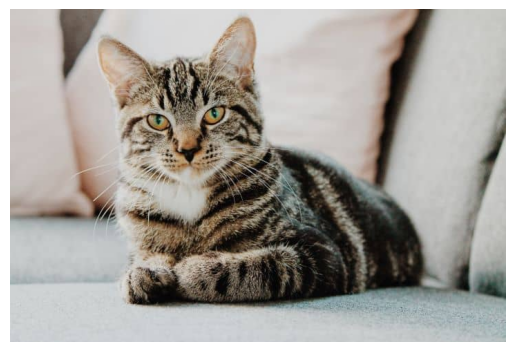

Classe prevista: 0


In [ ]:
#Supor que o modelo está em produção - código do beckend
# Carregar modelo treinado
#num_classes = 2
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = models.resnet18(pretrained=False)
#model.fc = nn.Linear(model.fc.in_features, num_classes)
#model.load_state_dict(torch.load("/content/drive/MyDrive/model.pth"))
#model = model.to(device)
#model.eval()
#print("Modelo carregado com sucesso!")

# Colocar o modelo em modo de avaliação - já que a linha acima está comentanda.
model.eval()

from PIL import Image
import matplotlib.pyplot as plt

#Caminho da imagem no Google Drive
image_path = "/content/drive/MyDrive/dataset/meus/vida-de-gato.jpg"

#Abrir a imagem
img = Image.open(image_path)
img.show()  #Exibir a imagem para conferir se foi carregada corretamente

#Transformar a imagem
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F

#Definir transformações
transform = transforms.Compose([
    transforms.Resize((224, 224)),  #Redimensiona para 224x224
    transforms.ToTensor(),  #Converte para tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #Normaliza os valores dos pixels
])

#Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
print(f"Classe prevista: {predicted_class}")

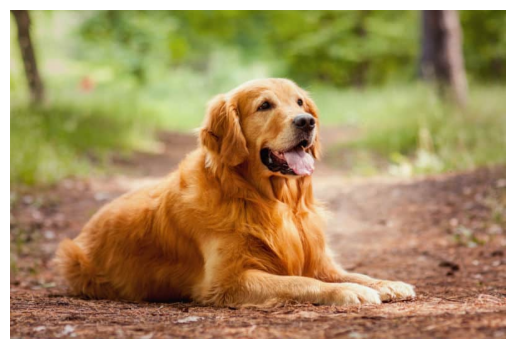

Classe prevista: 1


In [ ]:
#Classe 1 - teste
image_path = "/content/drive/MyDrive/dataset/meus/raca-de-cachorro-docil-2.jpg"

# Abrir a imagem
img = Image.open(image_path)

# Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)

# Enviar para GPU se disponível
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

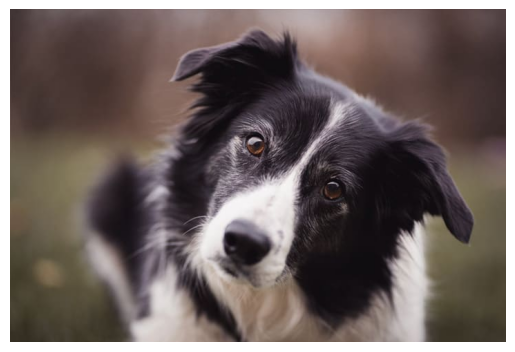

Classe prevista: 1


In [ ]:
#Classificação de dog

# Caminho da imagem no Google Drive
image_path = "/content/drive/MyDrive/dataset/meus/cachorro-pastoreio-pet.jpg"
# Abrir a imagem
img = Image.open(image_path)

# Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

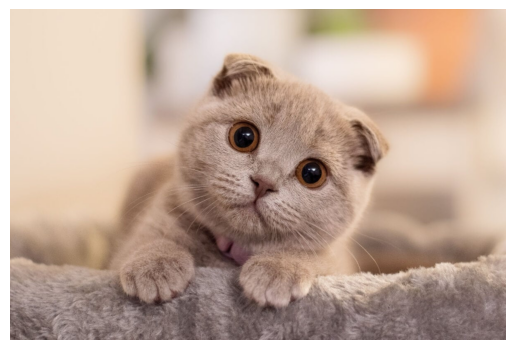

Classe prevista: 1


In [ ]:
#Classificação de cat

# Caminho da imagem no Google Drive
image_path = "/content/drive/MyDrive/dataset/meus/10-curiosidades-sobre-os-filhotes-de-gato.jpg"
# Abrir a imagem
img = Image.open(image_path)

# Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

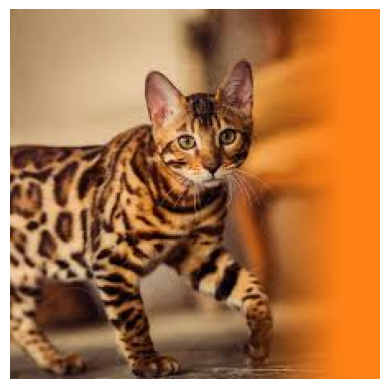

Classe prevista: 0


In [ ]:
#Classificação de cat

# Caminho da imagem no Google Drive
image_path = "/content/drive/MyDrive/dataset/meus/images.jpg"
# Abrir a imagem
img = Image.open(image_path)

# Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

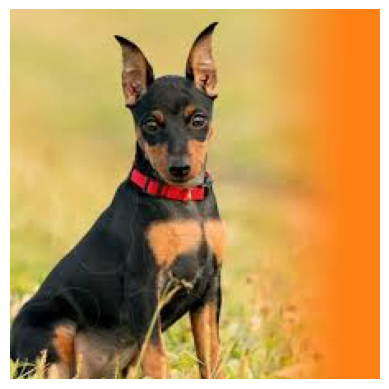

Classe prevista: 1


In [ ]:
#Classificação de pinscher

# Caminho da imagem no Google Drive
image_path = "/content/drive/MyDrive/dataset/meus/pinscher.jpg"
# Abrir a imagem
img = Image.open(image_path)

# Aplicar transformações e adicionar uma dimensão de batch
input_tensor = transform(img).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Fazer a predição
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Converter logits para probabilidades
    predicted_class = torch.argmax(probabilities).item()  # Pegar a classe com maior probabilidade

plt.imshow(img)
plt.axis('off')  # Opcional: remove os eixos
plt.show()
# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")